In [30]:
library(XML)
ubase = "http://www.cherryblossom.org/"

In [31]:
menURLs = 
  c("results/1999/cb99m.html", "results/2000/Cb003m.htm", "results/2001/oof_m.html",
    "results/2002/oofm.htm", "results/2003/CB03-M.HTM",
    "results/2004/men.htm", "results/2005/CB05-M.htm", 
    "results/2006/men.htm", "results/2007/men.htm", 
    "results/2008/men.htm", "results/2009/09cucb-M.htm",
    "results/2010/2010cucb10m-m.htm", 
    "results/2011/2011cucb10m-m.htm",
    "results/2012/2012cucb10m-m.htm")

urls = paste(ubase, menURLs, sep = "")

urls[1:3]

[1] "http://www.cherryblossom.org/results/1999/cb99m.html"
[2] "http://www.cherryblossom.org/results/2000/Cb003m.htm"
[3] "http://www.cherryblossom.org/results/2001/oof_m.html"

In [32]:
womenURLs = 
  c(
    "results/1999/cb99m.html",
    "results/2000/Cb003f.htm",
    "results/2001/oof_f.html",
    "results/2002/ooff.htm",
    "results/2003/CB03-F.HTM",
    "results/2004/women.htm",
    "results/2005/CB05-F.htm",
    "results/2006/women.htm",
    "results/2007/women.htm",
    "results/2008/women.htm",
    "results/2010/2010cucb10m-f.htm",
    "results/2011/2011cucb10m-f.htm",
    "results/2012/2012cucb10m-f.htm"
)


Wurls = paste(ubase, womenURLs, sep = "")

Wurls[1:3]

[1] "http://www.cherryblossom.org/results/1999/cb99m.html"
[2] "http://www.cherryblossom.org/results/2000/Cb003f.htm"
[3] "http://www.cherryblossom.org/results/2001/oof_f.html"

In [33]:
years = c(1999, 2000,2001, 2002,2003,2004, 2005, 2006,2007, 2008,2010,2011, 2012)
womenTables = mapply(extractResTable, url = Wurls, year = years)
names(womenTables) = years
sapply(womenTables, length)

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2010 2011 2012 
3193 2169 2976 3338 3547 3907 4342 5445 5699 6405 8863 9038 9738

In [34]:
years = 1999:2012
menTables = mapply(extractResTable, url = urls, year = years)
names(menTables) = years
sapply(menTables, length)

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
3193 3019 3627 3727 3951 4164 4335 5245 5283 5913 6659 6919 7019 7201

In [35]:


#Modified function that works with year 1999 now.
extractResTable =
  #
  # Retrieve data from web site, 
  # find the preformatted text,
  # and write lines or return as a character vector.
  #
  function(url = "http://www.cherryblossom.org/results/2009/09cucb-F.htm",
           year = 1999, sex = "male", file = NULL)
  {
    doc = htmlParse(url)

    if (year == 2000) {
      # Get preformatted text from 4th font element
      # The top file is ill formed so the <pre> search doesn't work.
      ff = getNodeSet(doc, "//font")
      txt = xmlValue(ff[[4]])
      els = strsplit(txt, "\r\n")[[1]]
    }
    else if (year == 2009 & sex == "male") {
      # Get preformatted text from <div class="Section1"> element
      # Each line of results is in a <pre> element
      div1 = getNodeSet(doc, "//div[@class='Section1']")
      pres = getNodeSet(div1[[1]], "//pre")
      els = sapply(pres, xmlValue)
    }
     else if (year == 1999) {
               # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\n")[[1]]  
     } 
    else {
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\r\n")[[1]]   
    } 
    
    if (is.null(file)) return(els)
    # Write the lines as a text file.
    writeLines(els, con = file)
  }



In [36]:
men2001 = menTables[['2001']]
men2001[4:5]

[1] "PLACE NUM   NAME                  AG HOMETOWN           NET     GUN"    
[2] "===== ===== ===================== == ================== ======= ======="

In [37]:
women2001 = womenTables[['2001']]
womenTables[['2001']][1:2] = men2001[4:5]

In [38]:
mfilenames = paste("data/MenTxt/", 1999:2012, ".txt", sep = "")
write(menTables$'1999',mfilenames[1])
write(menTables$'2000',mfilenames[2])
write(menTables$'2001',mfilenames[3])
write(menTables$'2002',mfilenames[4])
write(menTables$'2003',mfilenames[5])
write(menTables$'2004',mfilenames[6])
write(menTables$'2005',mfilenames[7])
write(menTables$'2006',mfilenames[8])
write(menTables$'2007',mfilenames[9])
write(menTables$'2008',mfilenames[10])
write(menTables$'2009',mfilenames[11])
write(menTables$'2010',mfilenames[12])
write(menTables$'2011',mfilenames[13])
write(menTables$'2012',mfilenames[14])

In [44]:
years = c(1999, 2000,2001, 2002,2003,2004, 2005, 2006,2007, 2008,2010,2011, 2012)
wfilenames = paste("data/WomenTxt/", years, ".txt", sep = "")
write(womenTables$'1999',wfilenames[1])
write(womenTables$'2000',wfilenames[2])
write(womenTables$'2001',wfilenames[3])
write(womenTables$'2002',wfilenames[4])
write(womenTables$'2003',wfilenames[5])
write(womenTables$'2004',wfilenames[6])
write(womenTables$'2005',wfilenames[7])
write(womenTables$'2006',wfilenames[8])
write(womenTables$'2007',wfilenames[9])
write(womenTables$'2008',wfilenames[10])
write(womenTables$'2010',wfilenames[11])
write(womenTables$'2011',wfilenames[12])
write(womenTables$'2012',wfilenames[13])

In [45]:
findColLocs = function(spacerRow) {

  spaceLocs = gregexpr(" ", spacerRow)[[1]]
  rowLength = nchar(spacerRow)

  if (substring(spacerRow, rowLength, rowLength) != " ")
    return( c(0, spaceLocs, rowLength + 1))
  else return(c(0, spaceLocs))
}

In [46]:
selectCols =
  function(colNames, headerRow, searchLocs)
  {
    sapply(colNames,
           function(name, headerRow, searchLocs)
           {
             startPos = regexpr(name, headerRow)[[1]]
             if (startPos == -1)
               return( c(NA, NA) )
             
             index = sum(startPos >= searchLocs)
             c(searchLocs[index] + 1, searchLocs[index + 1] - 1)
           },
           headerRow = headerRow, searchLocs = searchLocs )
  }

In [47]:
extractVariables = 
function(file, varNames =c("name", "home", "ag", "gun",
                           "net", "time"))
{
  
  # Find the index of the row with =s
  eqIndex = grep("^===", file)
  # Extract the two key rows and the data 
  spacerRow = file[eqIndex] 
  headerRow = tolower(file[ eqIndex - 1 ])
  body = file[ -(1 : eqIndex) ]
       # Remove footnotes and blank rows
  footnotes = grep("^[[:blank:]]*(\\*|\\#)", body)
  if ( length(footnotes) > 0 ) body = body[ -footnotes ]
  blanks = grep("^[[:blank:]]*$", body)
  if (length(blanks) > 0 ) body = body[ -blanks ]
  
  
  # Obtain the starting and ending positions of variables   
  searchLocs = findColLocs(spacerRow)
  locCols = selectCols(varNames, headerRow, searchLocs)
  
  Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
    
  years = c(1999, 2000,2001, 2002,2003,2004, 2005, 2006,2007, 2008,2009,2010,2011, 2012)
  colnames(Values) = varNames
  
  return(Values)
}


# WOMEN

In [48]:
wfilenames = paste("data/WomenTxt/", 1999:2012, ".txt", sep = "")

womenFiles = lapply(wfilenames, readLines)
names(womenFiles) = 1999:2012

In [50]:
womenFiles[['2001']][1:15]

[1] "PLACE NUM   NAME                  AG HOMETOWN           NET     GUN"     
 [2] "===== ===== ===================== == ================== ======= =======" 
 [3] "                      "                                                  
 [4] "    1  6002 Elana MEYER           34 Rep Of S.africa      52:15   52:16#"
 [5] "    2  6004 Lydia GRIGORIEVA      27 Russia               53:12   53:15#"
 [6] "    3  6019 Eyerusalem KUMA       20 Ethiopia             53:16   53:19#"
 [7] "    4  6007 Milena GLUSAC         25 Usa                  53:33   53:34#"
 [8] "    5  6012 Olga KOVPOTINA        31 Russia               54:01   54:03#"
 [9] "    6  6020 Merima HASHIM         20 Ethiopia             54:29   54:31#"
[10] "    7  6005 Jane OMORO            27 Kenya                55:05   55:08#"
[11] "    8  6022 Alice MURIITHI        26 West Chester PA      55:19   55:22#"
[12] "    9  6008 Lucia SUBANO          33 Kenya                55:25   55:28#"
[13] "   10  6062 Alison HOLINKA        22 Williamsburg WA      56:45   56:49" 
[14] "   11  6097 Misti DEMKO           33 Hershey PA           56:50   57:11#"
[15] "   12  6018 Naoko ISHIBE          32 Washington DC        57:13   57:15#"

In [51]:
womenResMat = lapply(womenFiles, extractVariables)
age = sapply(womenResMat, 
             function(x) as.numeric(x[ , 'ag']))

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”

In [52]:
sapply(womenResMat, nrow)

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
3190 2166 2972 3334 3542 3899 4333 5435 5690 6397 8853 8853 9030 9730

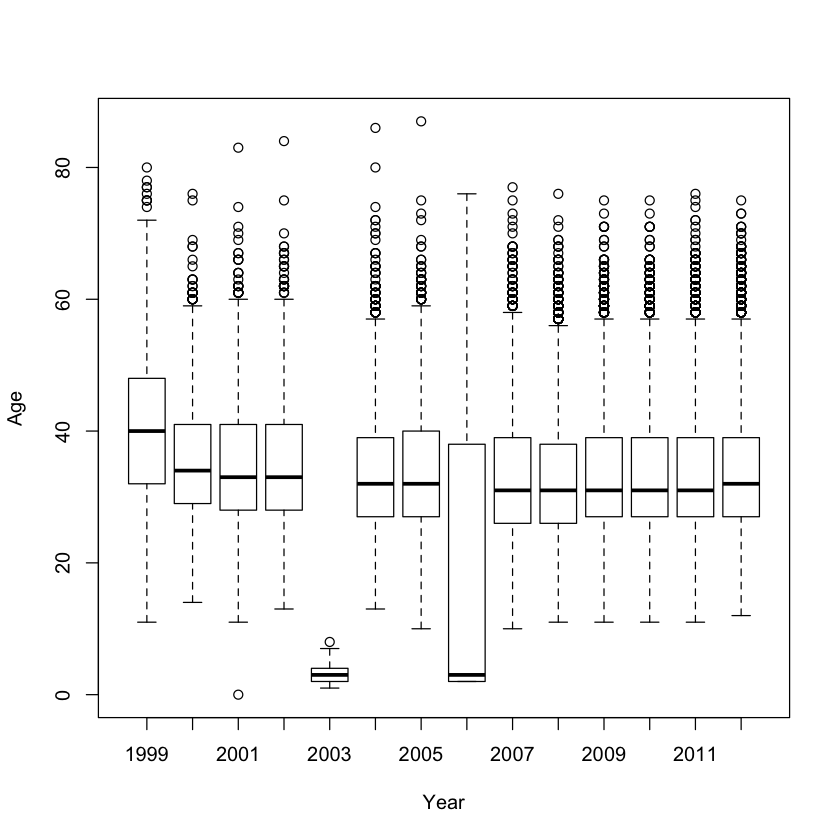

In [53]:
boxplot(age, ylab = "Age", xlab = "Year")

In [54]:
selectCols = function(shortColNames, headerRow, searchLocs) {
  sapply(shortColNames, function(shortName, headerRow, searchLocs){
    startPos = regexpr(shortName, headerRow)[[1]]
    if (startPos == -1) return( c(NA, NA) )
    index = sum(startPos >= searchLocs)
    c(searchLocs[index] + 1, searchLocs[index + 1])
  }, headerRow = headerRow, searchLocs = searchLocs )
}


In [55]:
womenResMat = lapply(womenFiles, extractVariables)
age = sapply(womenResMat, 
             function(x) as.numeric(x[ , 'ag']))

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”

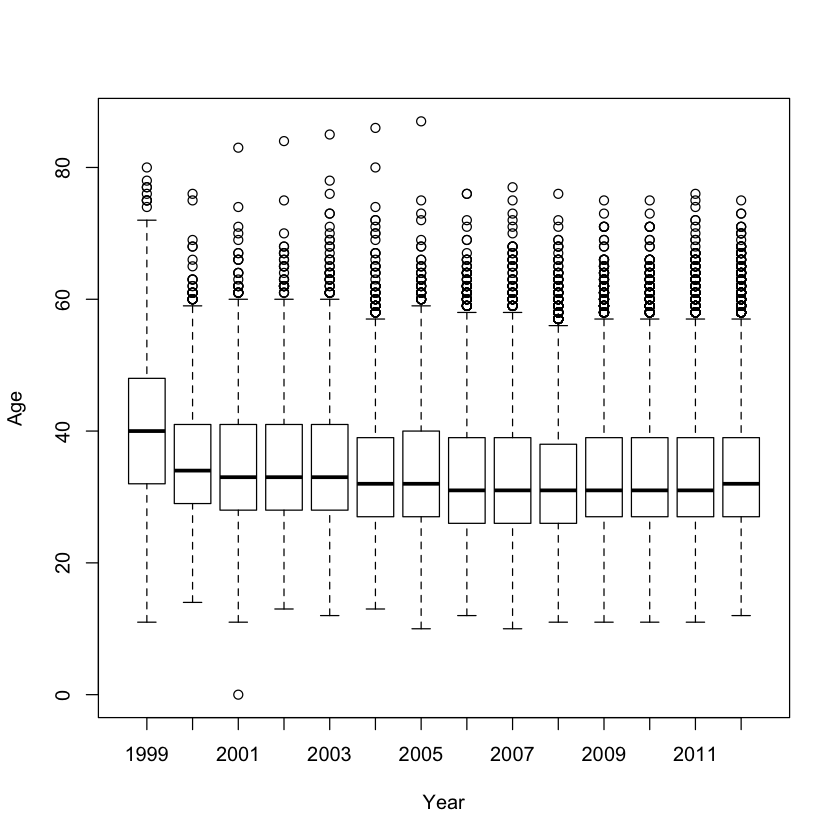

In [56]:
boxplot(age, ylab = "Age", xlab = "Year")

In [57]:
extractVariables = 
function(file, varNames =c("name", "home", "ag", "gun",
                           "net", "time"))
{
  
  # Find the index of the row with =s
  eqIndex = grep("^===", file)
  # Extract the two key rows and the data 
  spacerRow = file[eqIndex] 
  headerRow = tolower(file[ eqIndex - 1 ])
  body = file[ -(1 : eqIndex) ]
       # Remove footnotes and blank rows
  footnotes = grep("^[[:blank:]]*(\\*|\\#)", body)
  if ( length(footnotes) > 0 ) body = body[ -footnotes ]
  blanks = grep("^[[:blank:]]*$", body)
  if (length(blanks) > 0 ) body = body[ -blanks ]
  
  
  # Obtain the starting and ending positions of variables   
  searchLocs = findColLocs(spacerRow)
  locCols = selectCols(varNames, headerRow, searchLocs)
  
  Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
  colnames(Values) = varNames
  
  return(Values)
}


In [58]:
womenResMat = lapply(womenFiles, extractVariables)
age = sapply(womenResMat, 
             function(x) as.numeric(x[ , 'ag']))

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”

In [59]:
charTime = womenResMat[['2012']][, 'time']
head(charTime, 5)

[1] "  54:02 " "  54:24 " "  54:33 " "  54:36 " "  54:37 "

In [60]:
timePieces = strsplit(charTime, ":")
timePieces[[1]]

[1] "  54" "02 "

In [61]:
timePieces = sapply(timePieces, as.numeric)
runTime = sapply(timePieces,
                 function(x) {
                   if (length(x) == 2) x[1] + x[2]/60
                   else 60*x[1] + x[2] + x[3]/60
                 })
summary(runTime)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  54.03   89.08   98.03   99.02  107.90  170.97 

In [62]:
convertTime = function(time) {
  timePieces = strsplit(time, ":")
  timePieces = sapply(timePieces, as.numeric)
  sapply(timePieces, function(x) {
                      if (length(x) == 2) x[1] + x[2]/60
                      else 60*x[1] + x[2] + x[3]/60
                      })
}

In [63]:
createDF = function(Res, year, sex) 
{
  # Determine which time to use
  if ( !is.na(Res[1, 'net']) ) useTime = Res[ , 'net']
  else if ( !is.na(Res[1, 'gun']) ) useTime = Res[ , 'gun']
  else useTime = Res[ , 'time']
  
  # Remove # and * and blanks from time
  useTime = gsub("[#\\*[:blank:]]", "", useTime)
  runTime = convertTime(useTime[ useTime != "" ])
  
  # Drop rows with no time
  Res = Res[ useTime != "", ]
  
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , 'name'], home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}

In [64]:
womenDF = mapply(createDF, womenResMat, year = 1999:2012,
                 sex = rep("W", 14), SIMPLIFY = FALSE)


Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

In [65]:
sapply(womenDF, function(x) sum(is.na(x$runTime)))


1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0 5431    0    0    0    0    0    0

In [66]:
cbWomen = do.call(rbind, womenDF)
save(cbWomen, file = "cbWomen.rda")

In [67]:
dim(cbWomen)

[1] 77336     6

In [68]:
summary(cbWomen)

      year          sex                name               home          
 Min.   :1999   Length:77336       Length:77336       Length:77336      
 1st Qu.:2005   Class :character   Class :character   Class :character  
 Median :2008   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2007                                                           
 3rd Qu.:2010                                                           
 Max.   :2012                                                           
                                                                        
      age          runTime      
 Min.   : 0.0   Min.   : 46.98  
 1st Qu.:27.0   1st Qu.: 87.95  
 Median :32.0   Median : 97.00  
 Mean   :34.1   Mean   : 97.67  
 3rd Qu.:40.0   3rd Qu.:106.65  
 Max.   :87.0   Max.   :177.52  
 NA's   :16     NA's   :5431    

# MEN

In [69]:
mfilenames = paste("data/MenTxt/", 1999:2012, ".txt", sep = "")

menFiles = lapply(mfilenames, readLines)
names(menFiles) = 1999:2012

In [70]:
menResMat = lapply(menFiles, extractVariables)
age = sapply(menResMat, 
             function(x) as.numeric(x[ , 'ag']))

In [71]:
sapply(menResMat, nrow)

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
3190 3016 3561 3723 3946 4156 4324 5235 5274 5905 6649 6909 7011 7193

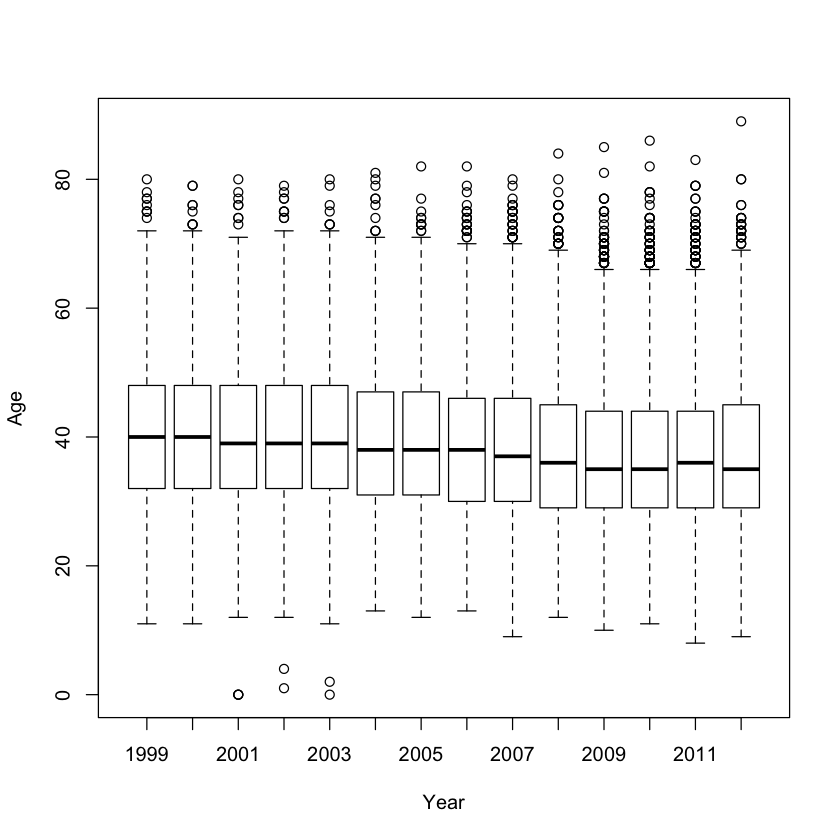

In [72]:
boxplot(age, ylab = "Age", xlab = "Year")

In [73]:
selectCols = function(shortColNames, headerRow, searchLocs) {
  sapply(shortColNames, function(shortName, headerRow, searchLocs){
    startPos = regexpr(shortName, headerRow)[[1]]
    if (startPos == -1) return( c(NA, NA) )
    index = sum(startPos >= searchLocs)
    c(searchLocs[index] + 1, searchLocs[index + 1])
  }, headerRow = headerRow, searchLocs = searchLocs )
}
menResMat = lapply(menFiles, extractVariables)
age = sapply(menResMat, 
             function(x) as.numeric(x[ , 'ag']))

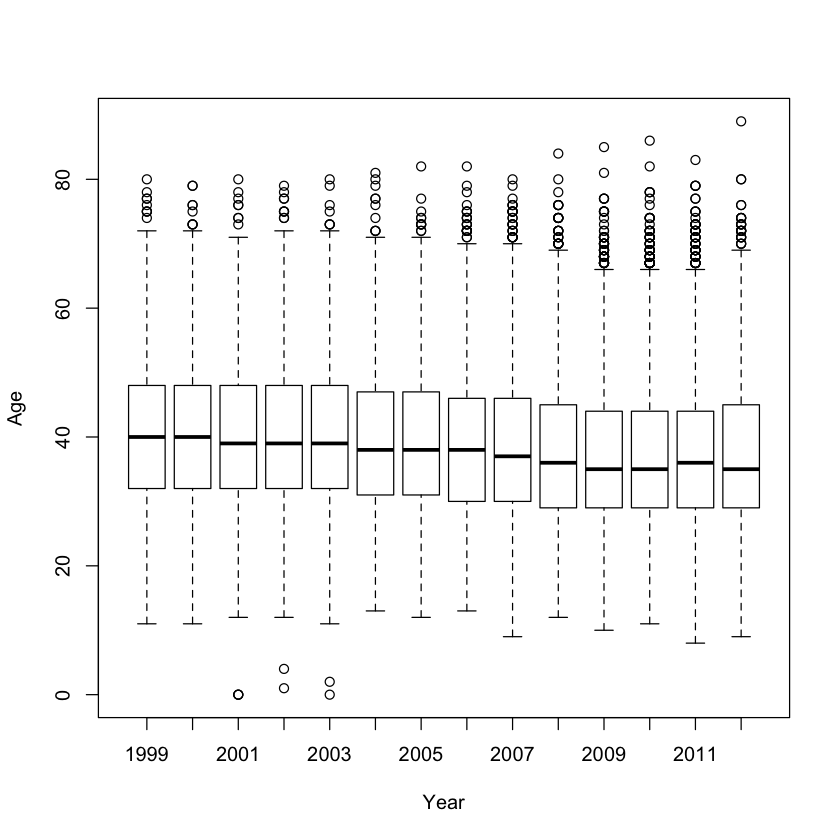

In [74]:
boxplot(age, ylab = "Age", xlab = "Year")

In [75]:
extractVariables = 
function(file, varNames =c("name", "home", "ag", "gun",
                           "net", "time"))
{
  
  # Find the index of the row with =s
  eqIndex = grep("^===", file)
  # Extract the two key rows and the data 
  spacerRow = file[eqIndex] 
  headerRow = tolower(file[ eqIndex - 1 ])
  body = file[ -(1 : eqIndex) ]
       # Remove footnotes and blank rows
  footnotes = grep("^[[:blank:]]*(\\*|\\#)", body)
  if ( length(footnotes) > 0 ) body = body[ -footnotes ]
  blanks = grep("^[[:blank:]]*$", body)
  if (length(blanks) > 0 ) body = body[ -blanks ]
  
  
  # Obtain the starting and ending positions of variables   
  searchLocs = findColLocs(spacerRow)
  locCols = selectCols(varNames, headerRow, searchLocs)
  
  Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
  colnames(Values) = varNames
  
  return(Values)
}
menResMat = lapply(menFiles, extractVariables)
age = sapply(menResMat, 
             function(x) as.numeric(x[ , 'ag']))

In [76]:
charTime = menResMat[['2012']][, 'time']
head(charTime, 5)

[1] "  45:15 " "  46:28 " "  47:33 " "  47:34 " "  47:40 "

In [77]:
timePieces = strsplit(charTime, ":")
timePieces[[1]]

[1] "  45" "15 "

In [78]:
timePieces = sapply(timePieces, as.numeric)
runTime = sapply(timePieces,
                 function(x) {
                   if (length(x) == 2) x[1] + x[2]/60
                   else 60*x[1] + x[2] + x[3]/60
                 })
summary(runTime)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  45.25   77.57   87.47   88.43   97.78  150.98 

In [79]:
convertTime = function(time) {
  timePieces = strsplit(time, ":")
  timePieces = sapply(timePieces, as.numeric)
  sapply(timePieces, function(x) {
                      if (length(x) == 2) x[1] + x[2]/60
                      else 60*x[1] + x[2] + x[3]/60
                      })
}

In [80]:
createDF = function(Res, year, sex) 
{
  # Determine which time to use
  if ( !is.na(Res[1, 'net']) ) useTime = Res[ , 'net']
  else if ( !is.na(Res[1, 'gun']) ) useTime = Res[ , 'gun']
  else useTime = Res[ , 'time']
  
  # Remove # and * and blanks from time
  useTime = gsub("[#\\*[:blank:]]", "", useTime)
  runTime = convertTime(useTime[ useTime != "" ])
  
  # Drop rows with no time
  Res = Res[ useTime != "", ]
  
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , 'name'], home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}

In [81]:
menDF = mapply(createDF, menResMat, year = 1999:2012,
                 sex = rep("M", 14), SIMPLIFY = FALSE)



Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduce

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

In [82]:
sapply(menDF, function(x) sum(is.na(x$runTime)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0 5232    0    0    0    0    0    0

In [83]:
cbmen = do.call(rbind, menDF)
save(cbmen, file = "cbmen.rda")

In [84]:
dim(cbmen)

[1] 70070     6

In [85]:
summary(cbmen)

      year          sex                name               home          
 Min.   :1999   Length:70070       Length:70070       Length:70070      
 1st Qu.:2004   Class :character   Class :character   Class :character  
 Median :2007   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2007                                                           
 3rd Qu.:2010                                                           
 Max.   :2012                                                           
                                                                        
      age           runTime      
 Min.   : 0.00   Min.   :  1.50  
 1st Qu.:30.00   1st Qu.: 77.17  
 Median :37.00   Median : 86.48  
 Mean   :38.61   Mean   : 87.42  
 3rd Qu.:46.00   3rd Qu.: 96.55  
 Max.   :89.00   Max.   :175.60  
 NA's   :21      NA's   :5232    

In [86]:
head(cbmen)

,year,sex,name,home,age,runTime
1999.1,1999,M,Worku Bikila,Ethiopia,28,46.98333
1999.2,1999,M,Lazarus Nyakeraka,Kenya,24,47.01667
1999.3,1999,M,James Kariuki,Kenya,27,47.05000
1999.4,1999,M,William Kiptum,Kenya,28,47.11667
1999.5,1999,M,Joseph Kimani,Kenya,26,47.51667
1999.6,1999,M,Josphat Machuka,Kenya,25,47.55000
